In [52]:
#import library that need to use 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('insurance.csv')

In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
#use for identification data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [56]:
#Finding missing values for each feature
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
#Data Pre Processing
df.sex = df.sex.astype('category').cat.codes
df.smoker = df.smoker.astype('category').cat.codes
df.region = df.region.astype('category').cat.codes

In [58]:
num_data = df.drop('charges', axis = 1)
class_target = df[['charges']]

In [59]:
num_data.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [60]:
class_target.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

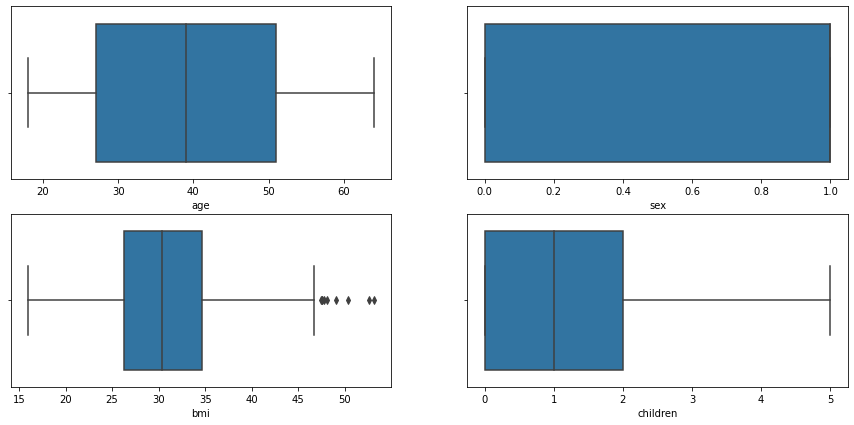

In [61]:
# Create count plots for all nominal features
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(num_data[i], ax=subplot)

In [62]:
#get class data
cat_data = df.select_dtypes(include='object')
cat_data.head()

""
0
1
2
3
4


In [63]:
#defining features (X) and (Y)
X = num_data
Y = class_target

In [64]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [65]:
print(Y)

          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [66]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
norm_data = sc.fit_transform(X)
X = pd.DataFrame(norm_data, columns=X.columns) 
X.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915


In [67]:
# define linear regression
mse = []


In [68]:

#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

#Step2: define linear regression model object
LR = LinearRegression()

#Step 3: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(LR,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

Cross Validation Mean Squared Error: 36957424.100 +/- 5630334.477
